# Imports and set up

In [1]:
import sys
import os

# Go up one level to set the root directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing.sequene_preprocessing import  categorize_sequences, add_sequence_features, validate_sequences
from sequence_representations.generate_desciptors import add_descriptors_features
from utility_scripts import plot_confusion_matrix, preprocess_descriptors, evaluate_model

In [ ]:
RAW_DATA_PATH = '/home/dreamtim/Coding/ITMO/itmo-cpp/input_data/all_peptides_for_classification.csv'
SEED = 42

In [4]:
%load_ext autoreload
%autoreload 2

# Data loading

In [5]:
peptides_df = pd.read_csv(RAW_DATA_PATH, index_col=0)
peptides_df

,id,sequence,extra_name,cpp_category,is_cpp,cpp_type,origin,id_uptake,peptide,uptake_type,...,raw_time,method,cell_line,cargo,mechanism,raw_temperature,id_article,doi,pubmed_id,title
0,2721,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,True,NaN,NaN,938.0,2721.0,Fluorescence intensity,...,1h,Fluorescent Microscopy,HSC-T6,FITC,NaN,37ºC,NaN,NaN,NaN,NaN
3,2724,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,True,NaN,NaN,969.0,2724.0,Fluorescence intensity,...,1h,Fluorescent Microscopy,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN
7,2761,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,True,NaN,NaN,1113.0,2761.0,Fluorescence,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
8,2762,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,True,NaN,NaN,1114.0,2762.0,Fluorescence,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
9,2630,?A-RR-[KRRRRRE],NaN,NaN,True,NaN,NaN,720.0,2630.0,Relative Mean Fluorescence intensity (%),...,NaN,Flow cytometry,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18348,2355,vrlpppvrlpppvrlppp,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18349,2360,ykqchkkGGkkGsG,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18350,2352,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18351,2386,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
assert peptides_df.sequence.nunique() == len(peptides_df)
assert 'Unnamed: 0' not in peptides_df.columns

# Prepoessing and feature generation

### Clean the data

In [7]:
clean_peptides_df = (peptides_df.copy()
    .pipe(categorize_sequences)
    .pipe(add_sequence_features)
    .pipe(validate_sequences)
)

In [8]:
clean_peptides_df

,id,sequence,extra_name,cpp_category,is_cpp,cpp_type,origin,id_uptake,peptide,uptake_type,...,standard_sequence,nh3_tail,po3_pos,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications
0,2721,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,True,NaN,NaN,938.0,2721.0,Fluorescence intensity,...,AKKKKKRFSFKKSFKLSGFSFKKNKK,False,False,False,False,False,False,False,False,"[(C, 2), (P, 3)]"
3,2724,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,True,NaN,NaN,969.0,2724.0,Fluorescence intensity,...,ARKRRQTSMTDFYHSKRRLIFS,False,False,False,False,False,False,False,False,"[(C, 2), (P, 3)]"
7,2761,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,True,NaN,NaN,1113.0,2761.0,Fluorescence,...,NaN,False,False,True,False,False,False,False,False,[]
8,2762,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,True,NaN,NaN,1114.0,2762.0,Fluorescence,...,NaN,False,False,True,False,False,False,False,False,[]
9,2630,?A-RR-[KRRRRRE],NaN,NaN,True,NaN,NaN,720.0,2630.0,Relative Mean Fluorescence intensity (%),...,ARRKRRRRRE,False,False,False,False,False,False,False,False,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18348,2355,vrlpppvrlpppvrlppp,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,[]
18349,2360,ykqchkkGGkkGsG,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,GGGG,False,False,False,False,False,False,False,False,"[(Y, 1), (K, 2), (Q, 3), (C, 4), (H, 5), (K, 6..."
18350,2352,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,SAGYLLGKINLKALAALAKKIL,False,False,False,False,False,False,True,False,"[(T, 2), (E, 3), (A, 4), (R, 5), (Y, 6), (L, 7)]"
18351,2386,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,True,False,"[(T, 2), (E, 3), (A, 4), (R, 5), (Y, 6), (L, 7)]"


In [9]:
clean_peptides_df.columns

Index(['id', 'sequence', 'extra_name', 'cpp_category', 'is_cpp', 'cpp_type',
       'origin', 'id_uptake', 'peptide', 'uptake_type', 'raw_efficiency',
       'raw_toxicity', 'raw_concentration', 'id_experiment',
       'peptide_experiment', 'raw_time', 'method', 'cell_line', 'cargo',
       'mechanism', 'raw_temperature', 'id_article', 'doi', 'pubmed_id',
       'title', 'sequence_category', 'standard_sequence', 'nh3_tail',
       'po3_pos', 'biotinylated', 'acylated_n_terminal', 'cyclic', 'amidated',
       'stearyl_uptake', 'hexahistidine_tagged', 'modifications'],
      dtype='object')

### Protein descriptors

In [10]:
descriptors_df = (
    clean_peptides_df.copy()
    .pipe(lambda df: df.dropna(subset=['standard_sequence']))
    .pipe(add_descriptors_features)
)

In [11]:
assert descriptors_df['gravy'].isna().sum() == 0

# Classification models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from catboost import CatBoostClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import optuna, joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

/home/dreamtim/micromamba/envs/itmo-cpp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Is the dataset balanced?

In [13]:
clean_peptides_df.is_cpp.value_counts()

is_cpp
True     1601
False    1321
Name: count, dtype: int64

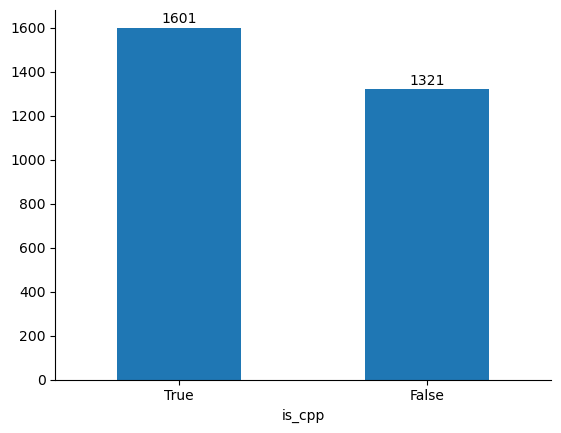

In [14]:
clean_peptides_df.is_cpp.value_counts().plot(kind='bar')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Number of samples in each class to the plot
for i, v in enumerate(clean_peptides_df.is_cpp.value_counts()):
    plt.text(i, v + 20, str(v), color='black', ha='center')

sns.despine()
plt.show()

**Dataset is ballanced 👌**

### Protein descriptors models

In [15]:
descriptors_df.columns

Index(['id', 'sequence', 'extra_name', 'cpp_category', 'is_cpp', 'cpp_type',
       'origin', 'id_uptake', 'peptide', 'uptake_type', 'raw_efficiency',
       'raw_toxicity', 'raw_concentration', 'id_experiment',
       'peptide_experiment', 'raw_time', 'method', 'cell_line', 'cargo',
       'mechanism', 'raw_temperature', 'id_article', 'doi', 'pubmed_id',
       'title', 'sequence_category', 'standard_sequence', 'nh3_tail',
       'po3_pos', 'biotinylated', 'acylated_n_terminal', 'cyclic', 'amidated',
       'stearyl_uptake', 'hexahistidine_tagged', 'modifications',
       'molecular_weight', 'seq_length', 'aromaticity', 'instability_index',
       'isoelectric_point', 'helix_fraction', 'turn_fraction',
       'sheet_fraction', 'molar_extinction_coefficient_reduced',
       'molar_extinction_coefficient_oxidized', 'gravy'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = preprocess_descriptors(descriptors_df, random_state=SEED)

X_train shape: (2174, 19)
X_test shape: (544, 19)
y_train shape: (2174,)
y_test shape: (544,)


/home/dreamtim/Coding/ITMO/itmo-cpp/classifier/utility_scripts.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype(int)
/home/dreamtim/Coding/ITMO/itmo-cpp/classifier/utility_scripts.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype(int)
/home/dreamtim/Coding/ITMO/itmo-cpp/classifier/utility_scripts.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [17]:
X_train.head()

,seq_length,molecular_weight,nh3_tail,po3_pos,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy
3015,6.0,863.0551,0,0,0,0,0,0,0,0,0.666667,-41.766667,10.002737,0.333333,0.000000,0.666667,0.0,0.0,0.566667
7490,16.0,1904.2576,0,0,0,0,0,0,0,0,0.062500,19.137500,9.699413,0.750000,0.062500,0.250000,1490.0,1490.0,-1.143750
2641,17.0,2221.0909,0,0,0,0,0,0,0,0,0.000000,-17.200000,4.160580,0.000000,0.647059,0.000000,0.0,0.0,-3.852941
15984,6.0,677.8352,0,0,0,0,0,0,0,0,0.000000,104.633333,9.720043,0.166667,0.500000,0.333333,0.0,0.0,-0.216667
8666,13.0,1669.0065,1,0,0,0,0,1,0,0,0.076923,108.600000,11.999968,0.384615,0.153846,0.384615,5500.0,5500.0,-0.938462


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 3015 to 2724
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   seq_length                             2174 non-null   float64
 1   molecular_weight                       2174 non-null   float64
 2   nh3_tail                               2174 non-null   int64  
 3   po3_pos                                2174 non-null   int64  
 4   biotinylated                           2174 non-null   int64  
 5   acylated_n_terminal                    2174 non-null   int64  
 6   cyclic                                 2174 non-null   int64  
 7   amidated                               2174 non-null   int64  
 8   stearyl_uptake                         2174 non-null   int64  
 9   hexahistidine_tagged                   2174 non-null   int64  
 10  aromaticity                            2174 non-null   float64
 11  instab

In [19]:
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2]
print("Binary features:", binary_features)


Binary features: ['nh3_tail', 'acylated_n_terminal', 'cyclic', 'amidated', 'stearyl_uptake', 'hexahistidine_tagged']


In [20]:
results = []

##### Logistic Regression

In [21]:
pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=5000, 
                           solver='lbfgs', 
                           random_state=SEED)
)

pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [22]:
y_pred_lr = pipe.predict(X_test)
print(classification_report(y_test, y_pred_lr))
results.append(evaluate_model(y_test, y_pred_lr, 'Descriptors - Logistic Regression'))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       264
           1       0.76      0.78      0.77       280

    accuracy                           0.76       544
   macro avg       0.76      0.76      0.76       544
weighted avg       0.76      0.76      0.76       544



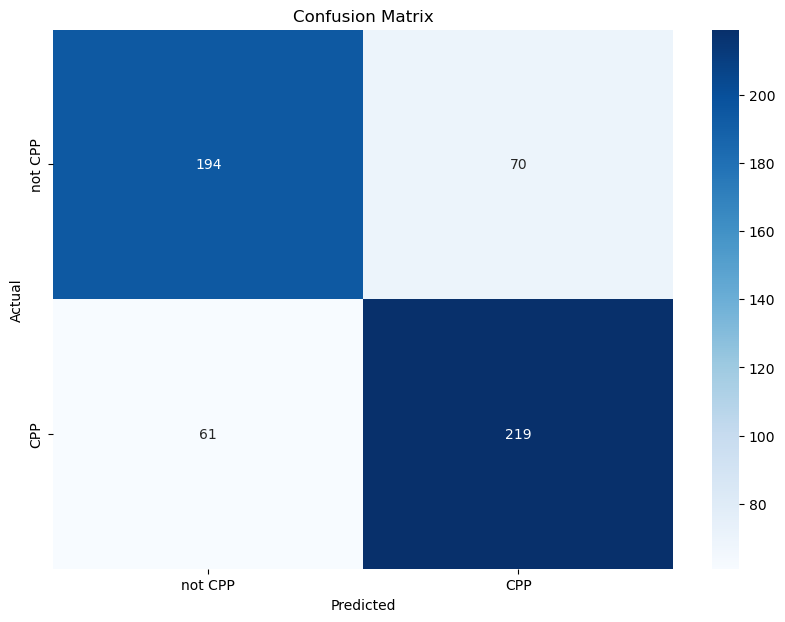

In [23]:
plot_confusion_matrix(y_test, y_pred_lr, labels=['not CPP', 'CPP'])

##### Decision Tree

In [24]:
dt_clf = DecisionTreeClassifier(random_state=SEED)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_dt))
results.append(evaluate_model(y_test, y_pred_dt, 'Descriptors - Decision Tree'))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       264
           1       0.75      0.77      0.76       280

    accuracy                           0.75       544
   macro avg       0.75      0.75      0.75       544
weighted avg       0.75      0.75      0.75       544



##### Random Forest

In [26]:
rf_clf = RandomForestClassifier(random_state=SEED)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
results.append(evaluate_model(y_test, y_pred_rf, 'Descriptors - Random Forest'))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       264
           1       0.84      0.85      0.85       280

    accuracy                           0.84       544
   macro avg       0.84      0.84      0.84       544
weighted avg       0.84      0.84      0.84       544



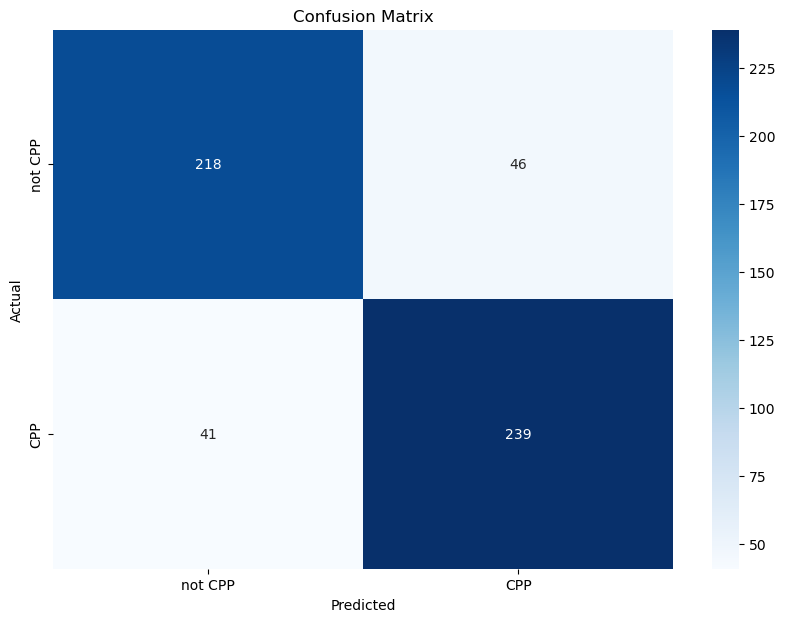

In [27]:
plot_confusion_matrix(y_test, y_pred_rf, labels=['not CPP', 'CPP'])

##### Support Vector Machine

In [28]:
pipe = make_pipeline(
        StandardScaler(),
        SVC(probability=True)
)

pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [29]:
y_pred_svm = pipe.predict(X_test)
print(classification_report(y_test, y_pred_svm))
results.append(evaluate_model(y_test, y_pred_svm, 'Descriptors - SVM'))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       264
           1       0.79      0.81      0.80       280

    accuracy                           0.79       544
   macro avg       0.79      0.79      0.79       544
weighted avg       0.79      0.79      0.79       544



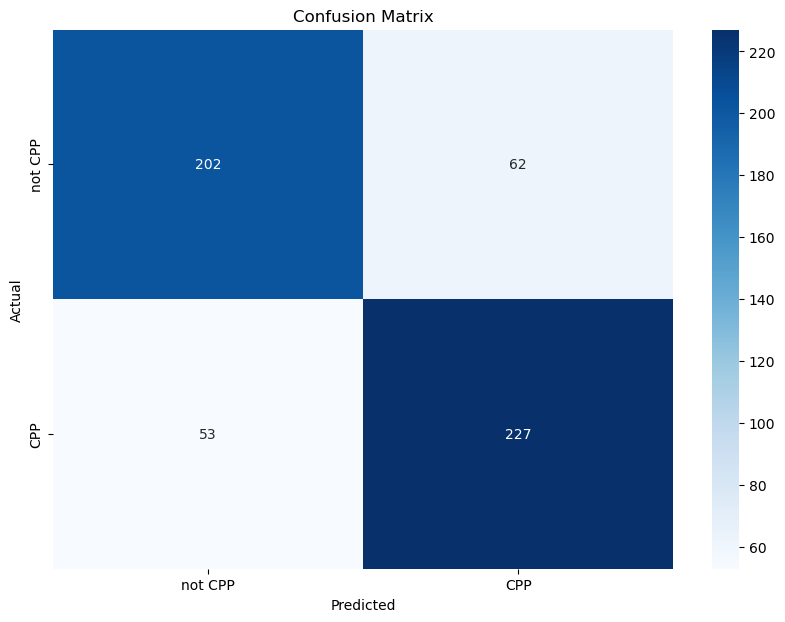

In [30]:
plot_confusion_matrix(y_test, y_pred_svm, labels=['not CPP', 'CPP'])

##### CatBoost

In [31]:
X_tr, X_val, y_tr, y_val = train_test_split(
        X_train, y_train, test_size=0.15, stratify=y_train, random_state=42)

cat_clf = CatBoostClassifier(
        iterations      = 5000,          # big upper limit …
        learning_rate   = 0.05,          # … compensated by early stopping
        depth           = 6,
        random_seed     = SEED,
        loss_function   = 'Logloss',
        eval_metric     = 'AUC',         # or 'PR' for rare CPPs
        auto_class_weights = 'Balanced', # handles skew
        od_type         = 'Iter',        # ordered stopping
        od_wait         = 60,            # stop if 60 iters w/o improvement
        verbose         = 200            # progress every 200 iters
)

cat_clf.fit(
        X_tr, y_tr,
        eval_set      = (X_val, y_val),
        cat_features  = binary_features,    # optional
        use_best_model= True             # roll back to best-score iteration
)

y_pred_cat = cat_clf.predict(X_test)

0:	test: 0.7896077	best: 0.7896077 (0)	total: 56.4ms	remaining: 4m 41s
200:	test: 0.8688979	best: 0.8698712 (187)	total: 558ms	remaining: 13.3s
400:	test: 0.8785190	best: 0.8786688 (398)	total: 1.02s	remaining: 11.7s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.8816262354
bestIteration = 451

Shrink model to first 452 iterations.


In [32]:
print(classification_report(y_test, y_pred_cat))
results.append(evaluate_model(y_test, y_pred_cat, 'Descriptors - CatBoost'))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       264
           1       0.82      0.88      0.84       280

    accuracy                           0.83       544
   macro avg       0.84      0.83      0.83       544
weighted avg       0.84      0.83      0.83       544



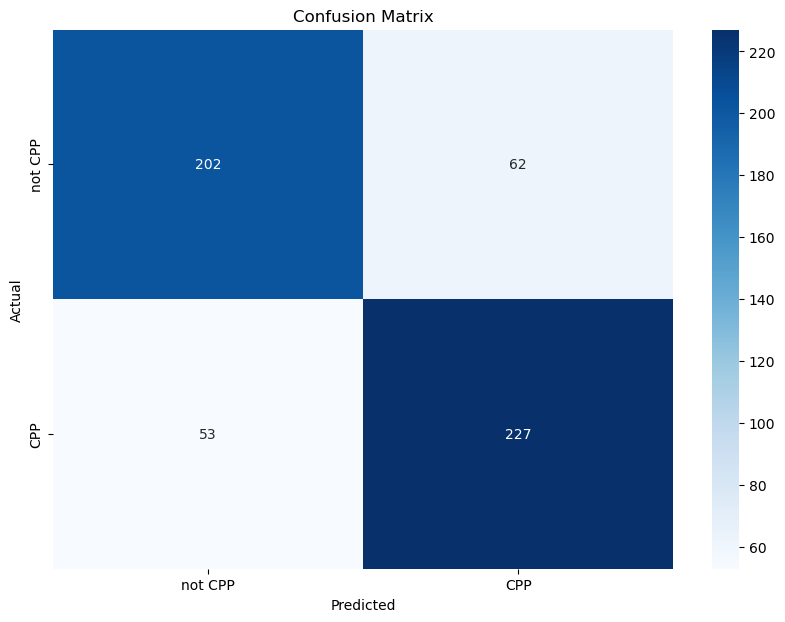

In [40]:
plot_confusion_matrix(y_test, y_pred_svm, labels=['not CPP', 'CPP'])

##### Comparing models

In [33]:
resulds_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
resulds_df

,Model,Accuracy,Precision,Recall,F1-Score
2,Descriptors - Random Forest,0.840074,0.838596,0.853571,0.846018
4,Descriptors - CatBoost,0.834559,0.816667,0.875000,0.844828
3,Descriptors - SVM,0.788603,0.785467,0.810714,0.797891
0,Descriptors - Logistic Regression,0.759191,0.757785,0.782143,0.769772
1,Descriptors - Decision Tree,0.748162,0.747405,0.771429,0.759227


##### Tuned Random Forest

Wet-lab validation is expensive, so it is worse to test a false positive than to miss a few true CPPs. That is a precision-first scenario (high PPV, low false-positive rate). So we will tune the best models to maximize precision.

In [57]:
N_TRIALS         = 50
N_JOBS           = -1          # all CPU cores
TARGET_PRECISION = 0.9        # wet-lab requirement
CV_FOLDS         = 5

# ---------------------------------------------------------------------
# 0.  Reserve an untouched VALIDATION SPLIT for threshold tuning
# ---------------------------------------------------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.20,
    stratify=y_train,
    random_state=SEED
)

# ---------------------------------------------------------------------
# 1. Optuna objective  (inner 5-fold CV on X_tr)
# ---------------------------------------------------------------------
def objective(trial):
    """Return cross-validated Average-Precision for one hyper-parameter set."""
    params = {
        "n_estimators":      trial.suggest_int("n_estimators", 200, 2000, step=200),
        "max_depth":         trial.suggest_int("max_depth", 2, 50, step=2),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf":  trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features":      trial.suggest_categorical("max_features",
                                                       ["sqrt", "log2", None]),
        "bootstrap":    trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": trial.suggest_categorical("class_weight",
                                                  [None, "balanced", "balanced_subsample"]),
        "random_state": SEED,
        "n_jobs":       N_JOBS
    }

    rf = RandomForestClassifier(**params)

    # OPTIONAL: Feature scaling / engineering
    model = rf           # make_pipeline(StandardScaler(), rf)

    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=SEED)

    # Out-of-fold probability predictions
    probas = cross_val_predict(
                model,
                X_tr, y_tr,
                cv=cv,
                method="predict_proba",
                n_jobs=N_JOBS
            )[:, 1]

    return average_precision_score(y_tr, probas)      # maximise

# ---------------------------------------------------------------------
# 2. Run the Optuna study
# ---------------------------------------------------------------------
study = optuna.create_study(
            study_name="rf_ap_tuning",
            direction="maximize",
            sampler=optuna.samplers.TPESampler(seed=SEED)
        )
study.optimize(objective, n_trials=N_TRIALS, n_jobs=N_JOBS)

print("\nBest Average-Precision :", study.best_value)
print("Best hyper-parameters :")
for k, v in study.best_params.items():
    print(f"  {k:<18} {v}")

# ---------------------------------------------------------------------
# 3. Re-train best RF on the whole *training* part (X_tr)
#    and calibrate probabilities (isotonic, 5-fold CV)
# ---------------------------------------------------------------------
base_rf = RandomForestClassifier(**study.best_params)
cal_rf  = CalibratedClassifierCV(base_rf,
                                 cv=CV_FOLDS,
                                 method="isotonic",
                                 n_jobs=N_JOBS)
cal_rf.fit(X_tr, y_tr)

[I 2025-07-05 18:14:29,841] A new study created in memory with name: rf_ap_tuning


[I 2025-07-05 18:14:50,785] Trial 14 finished with value: 0.8793438803245002 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': False, 'class_weight': None}. Best is trial 14 with value: 0.8793438803245002.
[I 2025-07-05 18:14:58,594] Trial 7 finished with value: 0.8874468247723842 and parameters: {'n_estimators': 2000, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 7 with value: 0.8874468247723842.
[I 2025-07-05 18:15:02,875] Trial 6 finished with value: 0.8820330489302015 and parameters: {'n_estimators': 1800, 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 7 with value: 0.8874468247723842.
[I 2025-07-05 18:15:04,493] Trial 15 finished with value: 0.8914964792563173 and parameters: 


Best Average-Precision : 0.9007895114288847
Best hyper-parameters :
  n_estimators       1200
  max_depth          30
  min_samples_split  6
  min_samples_leaf   2
  max_features       log2
  bootstrap          False
  class_weight       balanced_subsample


,estimator,RandomForestC...timators=1200)
,method,'isotonic'
,cv,5
,n_jobs,-1
,ensemble,'auto'
,n_estimators,1200
,criterion,'gini'
,max_depth,30
,min_samples_split,6
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0


In [58]:
# ---------------------------------------------------------------------
# 4. Pick threshold on the untouched validation split
# ---------------------------------------------------------------------
val_probas = cal_rf.predict_proba(X_val)[:, 1]

prec, rec, thr = precision_recall_curve(y_val, val_probas)

idx = np.argmax(prec >= TARGET_PRECISION)
if idx == 0 and prec[idx] < TARGET_PRECISION:
    raise RuntimeError(f"Could not reach target precision {TARGET_PRECISION}")

opt_threshold = thr[idx]
print(f"\nThreshold selected on VALIDATION set:"
      f"\n  thr = {opt_threshold:.3f}"
      f"\n  precision_val = {prec[idx]:.3f}"
      f"\n  recall_val    = {rec[idx]:.3f}")

# ---------------------------------------------------------------------
# 5. Final model: fit *all* development data (train + val)
# ---------------------------------------------------------------------
final_base_rf = RandomForestClassifier(**study.best_params)
final_cal_rf  = CalibratedClassifierCV(final_base_rf,
                                       cv=CV_FOLDS,
                                       method="isotonic",
                                       n_jobs=N_JOBS)
final_cal_rf.fit(X_train, y_train)        # ← uses everything except the test set

# ---------------------------------------------------------------------
# 6. Evaluate on the blind TEST SET with the chosen threshold
# ---------------------------------------------------------------------
test_probas = final_cal_rf.predict_proba(X_test)[:, 1]
y_pred      = (test_probas >= opt_threshold).astype(int)

print("\n=== Blind-test metrics at fixed precision target ===")
print(classification_report(y_test, y_pred,
                            target_names=["non-CPP (0)", "CPP (1)"],
                            digits=3))



Threshold selected on VALIDATION set:
  thr = 0.825
  precision_val = 0.902
  recall_val    = 0.576

=== Blind-test metrics at fixed precision target ===
              precision    recall  f1-score   support

 non-CPP (0)      0.714     0.966     0.821       264
     CPP (1)      0.952     0.636     0.762       280

    accuracy                          0.796       544
   macro avg      0.833     0.801     0.792       544
weighted avg      0.837     0.796     0.791       544



In [60]:
results.append(evaluate_model(y_test, y_pred, 'Descriptors - Tuned Random Forest'))

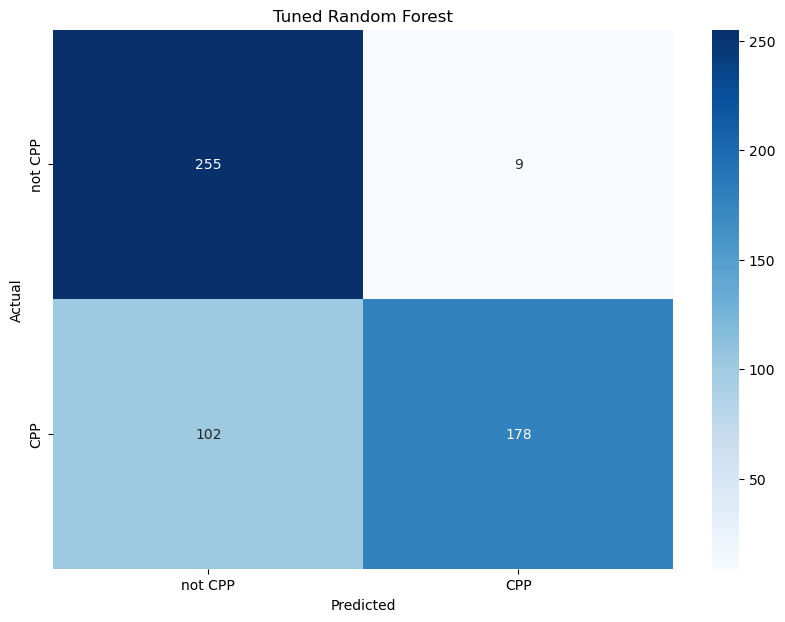

In [61]:
plot_confusion_matrix(y_test, y_pred, labels=['not CPP', 'CPP'], title='Tuned Random Forest')

In [62]:
resulds_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
resulds_df

,Model,Accuracy,Precision,Recall,F1-Score
2,Descriptors - Random Forest,0.840074,0.838596,0.853571,0.846018
4,Descriptors - CatBoost,0.834559,0.816667,0.875000,0.844828
3,Descriptors - SVM,0.788603,0.785467,0.810714,0.797891
0,Descriptors - Logistic Regression,0.759191,0.757785,0.782143,0.769772
5,Descriptors - Tuned Random Forest,0.795956,0.951872,0.635714,0.762313
1,Descriptors - Decision Tree,0.748162,0.747405,0.771429,0.759227


F1-score drops, but not dramatically, while percision becomes 0.95, so tuning was successful.

##### Feature importances

In [65]:
import shap

In [69]:
rf_for_shap = RandomForestClassifier(**study.best_params,
                                     random_state = SEED)        # keep the seed you used in Optuna
rf_for_shap.fit(X_train, y_train)

# ------------------------------------------------------------------
# 2.  Build a SHAP TreeExplainer
# ------------------------------------------------------------------
shap.initjs()

# 100 background rows are enough for RF; pick at random but reproducibly
background = shap.sample(X_train, 100, random_state=1)

explainer = shap.TreeExplainer(
            model                 = rf_for_shap,
            data                  = background,
            model_output          = "probability",      # raw forest probability (0-1)
            feature_perturbation  = "interventional"    # respect feature correlations
)

In [ ]:
raw_shap_values = explainer.shap_values(X_test)

100%|===================| 1084/1088 [05:52<00:01]        

In [80]:
shap_values_pos = raw_shap_values[:, :, 1] 

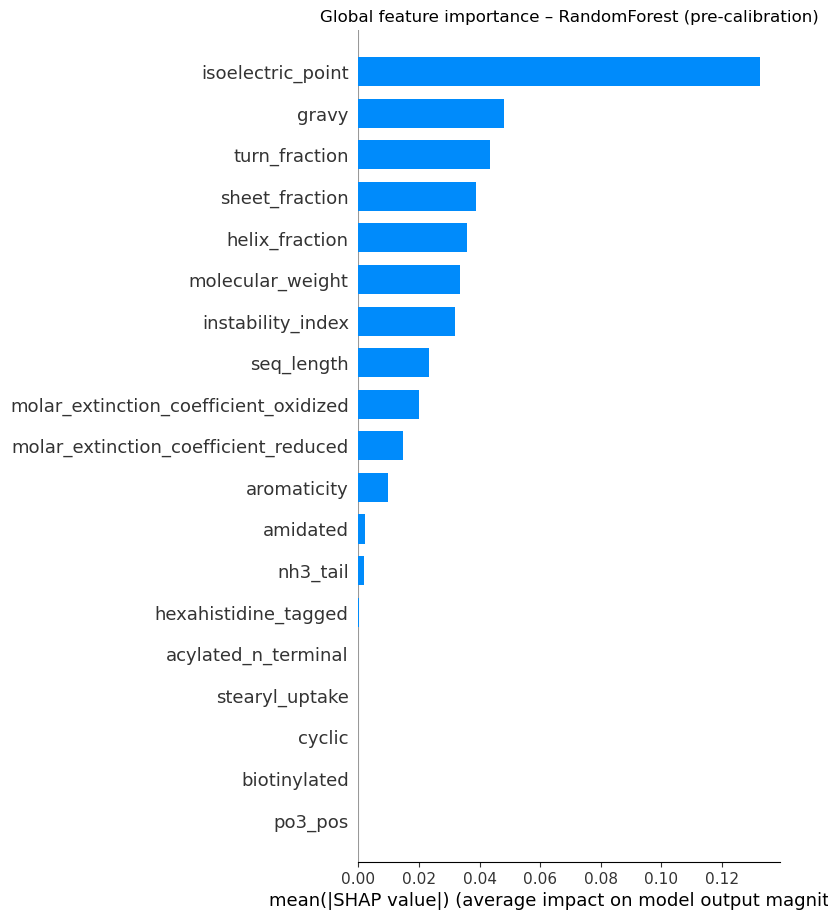

In [81]:
shap.summary_plot(
        shap_values_pos,
        X_test,
        plot_type   = "bar",
        max_display = 20,
        show        = False
)
plt.title("Global feature importance – RandomForest (pre-calibration)")
plt.show()

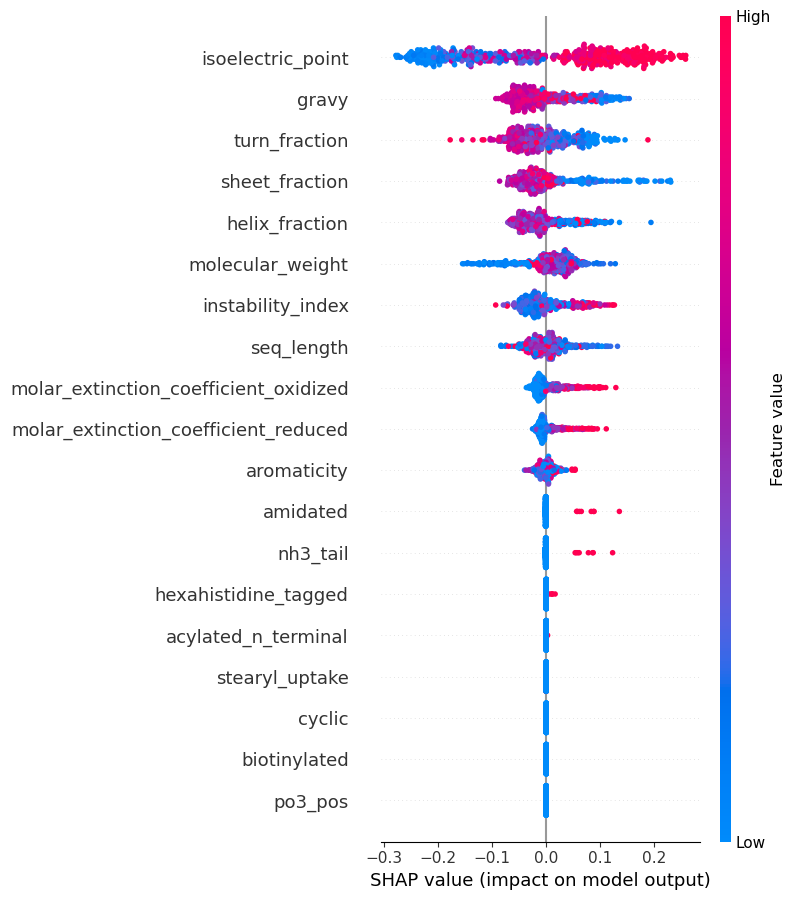

In [82]:
shap.summary_plot(shap_values_pos, X_test, max_display=20)

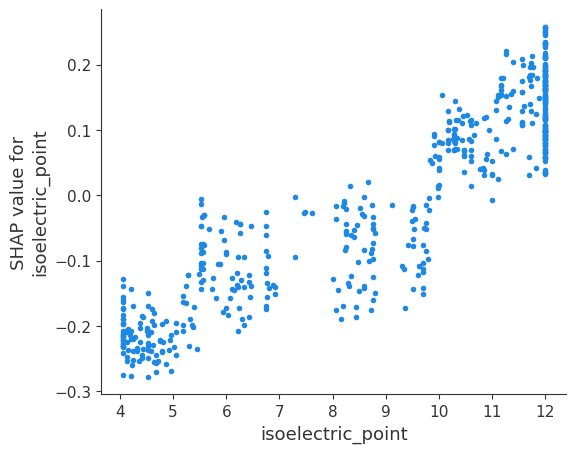

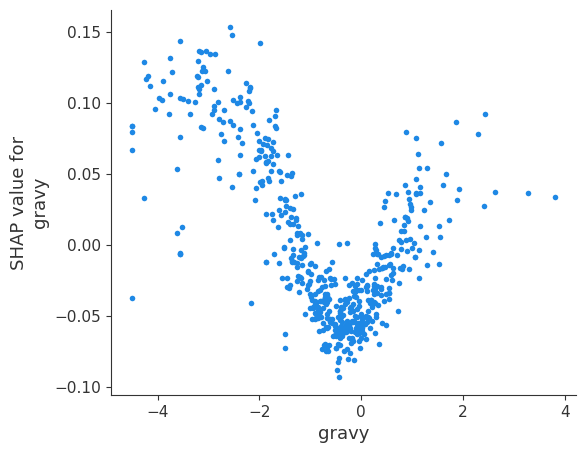

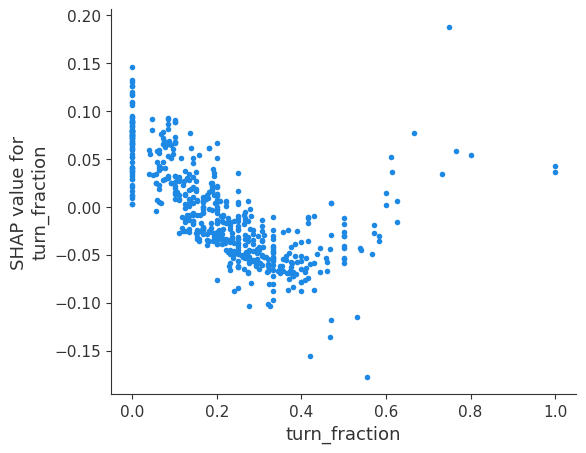

In [83]:
# 5.  Drill-down: dependence plots for top 3 features
# ------------------------------------------------------------------
top3 = np.argsort(np.abs(shap_values_pos).mean(0))[::-1][:3]
for idx in top3:
    shap.dependence_plot(
        ind              = X_test.columns[idx],
        shap_values      = shap_values_pos,
        features         = X_test,
        interaction_index= None
    )

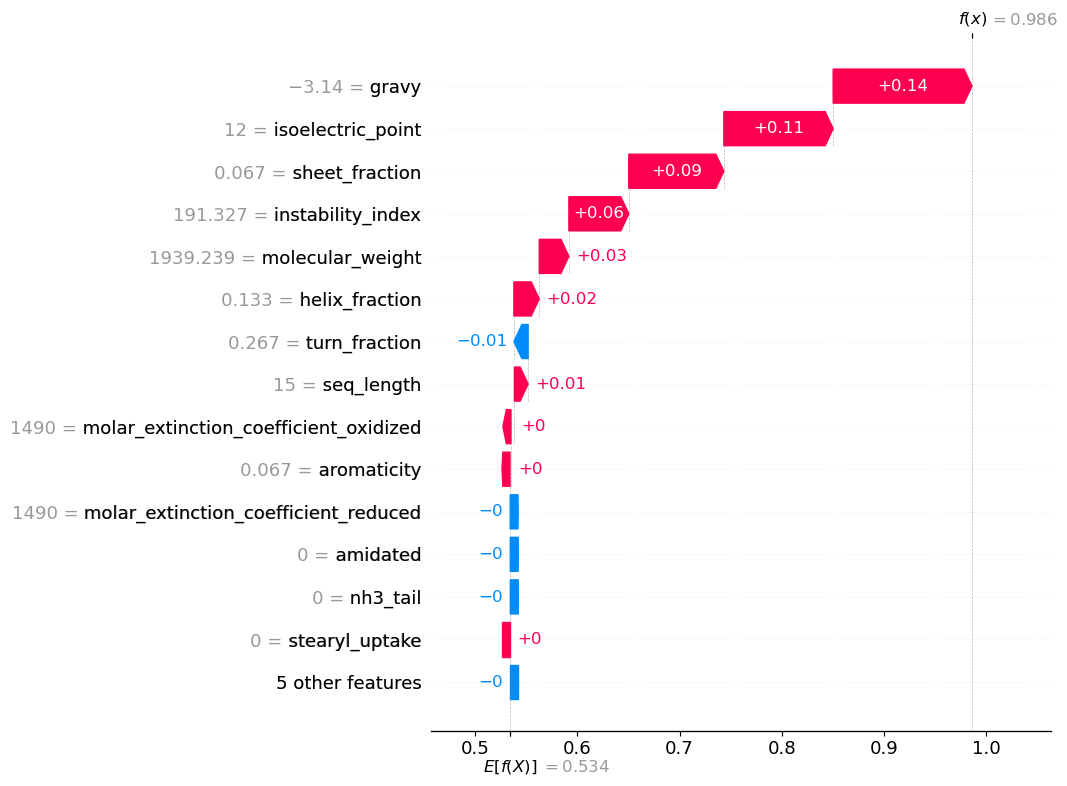

In [ ]:
# ── pick one sample ───────────────────────────────────────────
row      = i                       # sample index you want to explain
vals     = shap_values_pos[row, :] # shape (19,)
featrow  = X_test.iloc[row, :]     # Series (19,)

shap.plots.waterfall(
        shap.Explanation(
                values   = shap_values_pos[row, :],
                base_values = explainer.expected_value[1],
                data     = X_test.iloc[row, :],
                feature_names = X_test.columns
        ),
        max_display = 15            # top 15 contributors
)

In [89]:
resulds_df.to_csv('results_from_descriptors.csv', index=False)